# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Restart the Kernel after you execute this command.

!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


**Important: Restart the Kernel at this moment**

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
## YOUR CODE HERE ##
# 1) Define a simple transform
# 1) Define transforms
mnist_mean = (0.1307,)
mnist_std  = (0.3081,)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mnist_mean, mnist_std)
])

# 2) Create training set and dataloader
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# 3) Create test set and dataloader
test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

## I chose the following preprocessing steps:

1. ToTensor() – This converts the MNIST images from PIL format (0–255 integers) to PyTorch tensors with values scaled between 0 and 1. This is necessary because PyTorch models expect inputs as tensors, not images.

2. Normalize(mean=0.1307, std=0.3081) – This scales the data so that the pixel values have a mean of 0 and a standard deviation of 1. Normalization helps the neural network train faster and more stably, because the inputs are centered and have consistent scale across all features.

ToTensor() is enough for visualization and basic network input.
I didn’t include other preprocessing steps like data augmentation because MNIST digits are already standardized and simple. 

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [3]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Showing 5 raw training images:
6


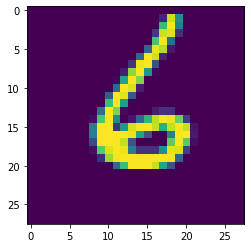

5


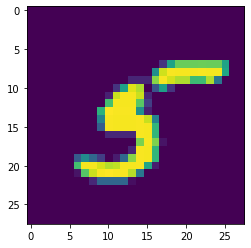

7


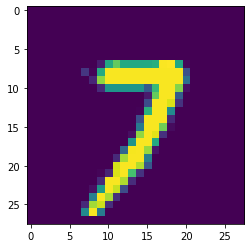

7


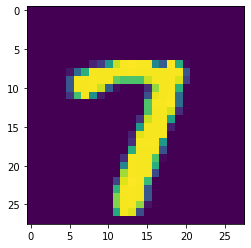

0


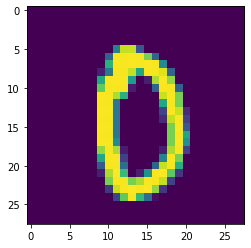

Showing 5 raw test images:
7


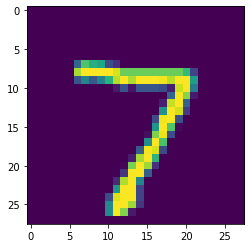

2


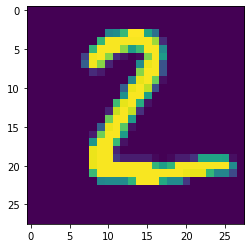

1


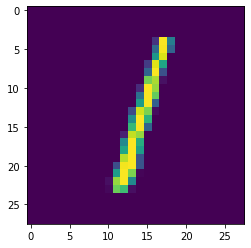

0


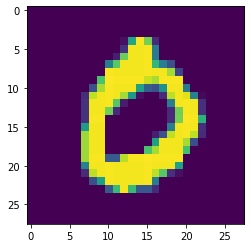

4


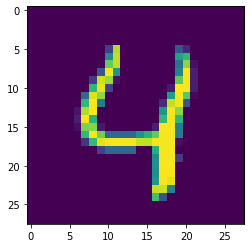

Batch shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])


In [4]:
# Explore data
## YOUR CODE HERE ##
print("Showing 5 raw training images:")
show5(train_loader)

print("Showing 5 raw test images:")
show5(test_loader)

#Check the shapes of the data
dataiter = iter(train_loader)
images, labels = next(dataiter)
print("Batch shape:", images.shape)   # e.g., (64,1,28,28)
print("Labels shape:", labels.shape)   # e.g., (64,)


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [5]:
#As I already preprocess my data in (3 cell), I don't need to do it again. Just flatten it.

## YOUR CODE HERE ##
class SimpleMLP(nn.Module):
    def __init__(self, input_size=28*28, hidden1=256, hidden2=128, num_classes=10):
        super(SimpleMLP, self).__init__()
        
        # Flatten layer converts (batch, 1, 28, 28) -> (batch, 784)
        self.flatten = nn.Flatten()
        
        # Fully connected layers
        self.fc1 = nn.Linear(input_size, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, num_classes)
        
        # Optional dropout
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = self.flatten(x)         # flatten if not already flattened
        x = F.relu(self.fc1(x))     # hidden layer 1 + ReLU
        x = self.dropout(x)          # dropout
        x = F.relu(self.fc2(x))     # hidden layer 2 + ReLU
        x = self.dropout(x)
        x = self.fc3(x)             # output layer (logits)
        return x

# Instantiate the network
net = SimpleMLP()
print(net)


SimpleMLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [6]:
## YOUR CODE HERE ##
# CrossEntropyLoss is suitable for multi-class classification problems like MNIST
criterion = nn.CrossEntropyLoss()  

# Adam optimizer is popular for fast convergence
optimizer = optim.Adam(net.parameters(), lr=0.001)

# CrossEntropyLoss combines LogSoftmax + NLLLoss, making it ideal for multi-class problems.
# Adam adapts learning rates for each parameter and often works well out-of-the-box.


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [7]:
## YOUR CODE HERE ##
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model to GPU if available
net = net.to(device)

# Lists to record loss per epoch
train_loss_history = []
val_loss_history = []

for epoch in range(num_epochs):
    # ---- Training ----
    net.train()
    running_train_loss = 0.0
    
    for batch_idx, (inputs, labels) in enumerate(train_loader):
        # Move inputs and labels to device (GPU or CPU)
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item()
        
        if (batch_idx + 1) % 250 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}], Loss: {running_train_loss/250:.4f}')
            running_train_loss = 0.0
    
    # Average training loss for this epoch
    train_loss_history.append(running_train_loss / len(train_loader))
    
    # ---- Validation ----
    net.eval()  # set model to evaluation mode (turns off dropout, batchnorm)
    running_val_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():  # no need to compute gradients
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
            
            # Compute accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_loss = running_val_loss / len(test_loader)
    val_loss_history.append(val_loss)
    val_accuracy = 100 * correct / total
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.2f}%\n')


Epoch [1/10], Batch [250], Loss: 0.4729
Epoch [1/10], Batch [500], Loss: 0.2426
Epoch [1/10], Batch [750], Loss: 0.1842
Epoch [1/10], Validation Loss: 0.1208, Accuracy: 96.46%

Epoch [2/10], Batch [250], Loss: 0.1388
Epoch [2/10], Batch [500], Loss: 0.1364
Epoch [2/10], Batch [750], Loss: 0.1344
Epoch [2/10], Validation Loss: 0.0886, Accuracy: 97.12%

Epoch [3/10], Batch [250], Loss: 0.0950
Epoch [3/10], Batch [500], Loss: 0.1135
Epoch [3/10], Batch [750], Loss: 0.0942
Epoch [3/10], Validation Loss: 0.0768, Accuracy: 97.62%

Epoch [4/10], Batch [250], Loss: 0.0820
Epoch [4/10], Batch [500], Loss: 0.0851
Epoch [4/10], Batch [750], Loss: 0.0829
Epoch [4/10], Validation Loss: 0.0794, Accuracy: 97.58%

Epoch [5/10], Batch [250], Loss: 0.0707
Epoch [5/10], Batch [500], Loss: 0.0686
Epoch [5/10], Batch [750], Loss: 0.0751
Epoch [5/10], Validation Loss: 0.0701, Accuracy: 97.89%

Epoch [6/10], Batch [250], Loss: 0.0603
Epoch [6/10], Batch [500], Loss: 0.0683
Epoch [6/10], Batch [750], Loss: 0.

Plot the training loss (and validation loss/accuracy, if recorded).

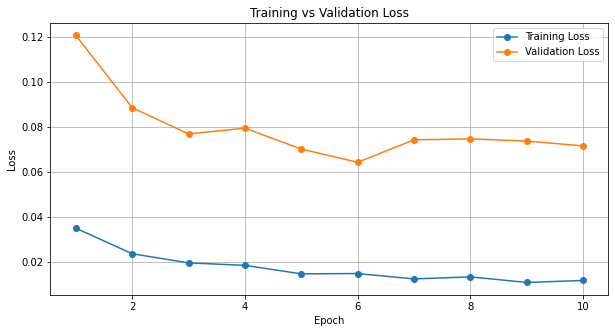

In [8]:
## YOUR CODE HERE ##
epochs = range(1, num_epochs + 1)

# Plot training and validation loss
plt.figure(figsize=(10,5))
plt.plot(epochs, train_loss_history, label='Training Loss', marker='o')
plt.plot(epochs, val_loss_history, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [10]:
## YOUR CODE HERE ##
#Set model to evaluation mode
net.eval()  

correct = 0
total = 0

with torch.no_grad():  # no gradient computation needed
    for inputs, labels in test_loader:
        # Move data to the same device as model
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = net(inputs)
        
        # Get predicted class (highest probability)
        _, predicted = torch.max(outputs.data, 1)
        
        # Count correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Compute accuracy
test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 98.08%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [12]:
## YOUR CODE HERE ##
# --- Hyperparameter tweaks ---
num_epochs = 15           # increased epochs
batch_size = 128          # larger batch size
learning_rate = 0.0005    # smaller learning rate
hidden1 = 512             # more neurons in first layer
hidden2 = 256             # more neurons in second layer
dropout_rate = 0.3        # increased dropout

# 1) Update DataLoader with new batch size
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 2) Instantiate the model with updated hidden layers/dropout
class TweakedMLP(nn.Module):
    def __init__(self, input_size=28*28, hidden1=hidden1, hidden2=hidden2, num_classes=10):
        super(TweakedMLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, num_classes)
        self.dropout = nn.Dropout(dropout_rate)
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x



train_loss_history = []
val_loss_history = []

for epoch in range(num_epochs):
    # ---- Training ----
    net.train()
    running_train_loss = 0.0
    
    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()
        
        if (batch_idx + 1) % 250 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}], Loss: {running_train_loss/250:.4f}')
            running_train_loss = 0.0
    
    train_loss_history.append(running_train_loss / len(train_loader))
    
    # ---- Validation ----
    net.eval()
    running_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_loss = running_val_loss / len(test_loader)
    val_loss_history.append(val_loss)
    val_accuracy = 100 * correct / total
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.2f}%\n')

net = TweakedMLP().to(device)
    
# 3) Define optimizer and loss
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# 4) Re-run the training loop (same as before)
# You can reuse the training + validation loop from earlier


Epoch [1/15], Batch [250], Loss: 0.4402
Epoch [1/15], Validation Loss: 0.1346, Accuracy: 95.87%

Epoch [2/15], Batch [250], Loss: 0.1463
Epoch [2/15], Validation Loss: 0.0899, Accuracy: 97.08%

Epoch [3/15], Batch [250], Loss: 0.1016
Epoch [3/15], Validation Loss: 0.0765, Accuracy: 97.45%

Epoch [4/15], Batch [250], Loss: 0.0799
Epoch [4/15], Validation Loss: 0.0700, Accuracy: 97.83%

Epoch [5/15], Batch [250], Loss: 0.0691
Epoch [5/15], Validation Loss: 0.0619, Accuracy: 98.19%

Epoch [6/15], Batch [250], Loss: 0.0553
Epoch [6/15], Validation Loss: 0.0596, Accuracy: 98.24%

Epoch [7/15], Batch [250], Loss: 0.0487
Epoch [7/15], Validation Loss: 0.0583, Accuracy: 98.20%

Epoch [8/15], Batch [250], Loss: 0.0431
Epoch [8/15], Validation Loss: 0.0581, Accuracy: 98.23%

Epoch [9/15], Batch [250], Loss: 0.0363
Epoch [9/15], Validation Loss: 0.0616, Accuracy: 98.20%

Epoch [10/15], Batch [250], Loss: 0.0302
Epoch [10/15], Validation Loss: 0.0550, Accuracy: 98.38%

Epoch [11/15], Batch [250], 

## Saving your model
Using `torch.save`, save your model for future loading.

In [13]:
## YOUR CODE HERE ##
torch.save(net, "mnist_model_full.pth")


In [14]:
#EXTRA
#to load the model which we saved early on
loaded_model = torch.load("mnist_model_full.pth")
loaded_model.eval()  # set to evaluation mode


TweakedMLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)